#### Import library

In [1]:
# 라이브러리 추가하기
import geopandas as gpd
from fiona.crs import from_epsg
%matplotlib inline

#### 서울시 행정동 goeJson 불러오기
* GeoDataframe 생성하기
* 데이터 확인하기
* plot()으로 지도 확인하기

In [2]:
# _01 서울시 법정동 geojson 파일
_seoul_h_dong = './maps/output/seoul_h_dong.geojson'

In [3]:
# _02 GeoDataFrame
seoul_h_dong_gdf = gpd.read_file(_seoul_h_dong)
print(seoul_h_dong_gdf.crs, '\n')
seoul_h_dong_gdf.info()
seoul_h_dong_gdf.head(10)

{'init': 'epsg:4326'} 

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 10 columns):
SGG_NM        424 non-null object
DONG_NM       424 non-null object
SGG_CODE      424 non-null object
SEDAE         424 non-null int64
SEDAE_INGU    424 non-null float64
TOTAL_POP     424 non-null int64
MALE_POP      424 non-null int64
FEMALE_POP    424 non-null int64
65_OVER       424 non-null int64
geometry      424 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 33.2+ KB


,SGG_NM,DONG_NM,SGG_CODE,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER,geometry
0,종로구,사직동,11110,4414,2.14,9717,4467,5250,1708,"POLYGON ((126.9768888427482 37.57565077944879,..."
1,종로구,삼청동,11110,1414,2.06,3097,1459,1638,634,"POLYGON ((126.982689386493 37.5950655194224, 1..."
2,종로구,부암동,11110,4325,2.39,10726,5160,5566,1748,"POLYGON ((126.9758511377569 37.59656422224408,..."
3,종로구,평창동,11110,7510,2.53,19163,9032,10131,3037,"POLYGON ((126.9750746678809 37.631386286513, 1..."
4,종로구,무악동,11110,3024,2.75,8375,3921,4454,1279,"POLYGON ((126.960673532739 37.58079784202972, ..."
5,종로구,교남동,11110,4379,2.34,10363,4850,5513,1406,"POLYGON ((126.9690483700185 37.56819441770832,..."
6,종로구,가회동,11110,2085,2.17,4657,2194,2463,900,"POLYGON ((126.9891359030894 37.59130668631862,..."
7,종로구,종로1.2.3.4가동,11110,5378,1.41,8592,5045,3547,1865,"POLYGON ((126.9964997845193 37.5810225677299, ..."
8,종로구,종로5·6가동,11110,3174,1.69,5690,3096,2594,1089,"POLYGON ((127.0101604483956 37.57156810157084,..."
9,종로구,이화동,11110,4462,1.85,8752,4075,4677,1302,"POLYGON ((127.0073325396313 37.58320333921623,..."


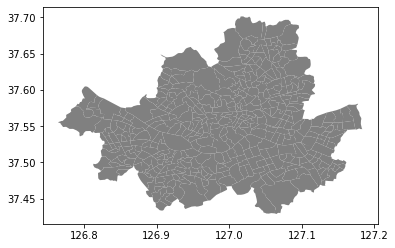

In [4]:
# _03 법정동 지도 보기
seoul_h_dong_gdf.plot(color='gray')

####  Dissolve를 이용해 행정동 -> 시군구 지도 데이터 만들기

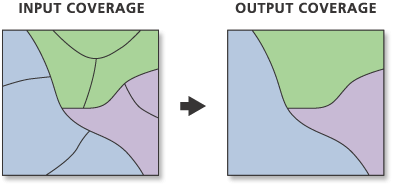

In [5]:
# _04 Dissolve를 이용해 시군구 데이터 만들기
seoul_sgg = seoul_h_dong_gdf.dissolve(by=['SGG_NM','SGG_CODE'], aggfunc='sum')
seoul_sgg

,,geometry,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER
SGG_NM,SGG_CODE,,,,,,,
강남구,11680,"POLYGON ((127.1110354206454 37.48293504402488,...",231612,54.29,561052,268941,292111,65060
강동구,11740,"POLYGON ((127.1458000886755 37.5219899668414, ...",177407,45.24,440359,218699,221660,56161
강북구,11305,"POLYGON ((127.0220295465139 37.61228702923131,...",142533,29.67,328002,160252,167750,56530
강서구,11500,"POLYGON ((126.8831662843492 37.55446522843518,...",254257,47.24,608255,296175,312080,76032
관악구,11620,"POLYGON ((126.9704905925551 37.4753683309936, ...",255352,42.12,520929,262006,258923,70046
광진구,11215,"POLYGON ((127.0922507470111 37.52678602619979,...",160798,33.30,372298,180645,191653,43953
구로구,11530,"POLYGON ((126.8953972611576 37.49203217901983,...",171570,35.71,441559,221386,220173,58794
금천구,11545,"POLYGON ((126.9152195932067 37.44005599984209,...",106066,22.57,253491,129775,123716,34170
노원구,11350,"POLYGON ((127.0680069739077 37.61556823410262,...",217619,48.92,558075,271025,287050,74243


In [6]:
# _05 index 초기화하기
seoul_sgg.reset_index(inplace=True)
seoul_sgg

,SGG_NM,SGG_CODE,geometry,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER
0,강남구,11680,"POLYGON ((127.1110354206454 37.48293504402488,...",231612,54.29,561052,268941,292111,65060
1,강동구,11740,"POLYGON ((127.1458000886755 37.5219899668414, ...",177407,45.24,440359,218699,221660,56161
2,강북구,11305,"POLYGON ((127.0220295465139 37.61228702923131,...",142533,29.67,328002,160252,167750,56530
3,강서구,11500,"POLYGON ((126.8831662843492 37.55446522843518,...",254257,47.24,608255,296175,312080,76032
4,관악구,11620,"POLYGON ((126.9704905925551 37.4753683309936, ...",255352,42.12,520929,262006,258923,70046
5,광진구,11215,"POLYGON ((127.0922507470111 37.52678602619979,...",160798,33.30,372298,180645,191653,43953
6,구로구,11530,"POLYGON ((126.8953972611576 37.49203217901983,...",171570,35.71,441559,221386,220173,58794
7,금천구,11545,"POLYGON ((126.9152195932067 37.44005599984209,...",106066,22.57,253491,129775,123716,34170
8,노원구,11350,"POLYGON ((127.0680069739077 37.61556823410262,...",217619,48.92,558075,271025,287050,74243
9,도봉구,11320,"POLYGON ((127.0463547756851 37.63915622931055,...",137378,35.03,346234,169553,176681,53488


In [7]:
# _06 정보확인
seoul_sgg.info()
seoul_sgg.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
SGG_NM        25 non-null object
SGG_CODE      25 non-null object
geometry      25 non-null object
SEDAE         25 non-null int64
SEDAE_INGU    25 non-null float64
TOTAL_POP     25 non-null int64
MALE_POP      25 non-null int64
FEMALE_POP    25 non-null int64
65_OVER       25 non-null int64
dtypes: float64(1), int64(5), object(3)
memory usage: 1.8+ KB


,SGG_NM,SGG_CODE,geometry,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER
0,강남구,11680,"POLYGON ((127.1110354206454 37.48293504402488,...",231612,54.29,561052,268941,292111,65060
1,강동구,11740,"POLYGON ((127.1458000886755 37.5219899668414, ...",177407,45.24,440359,218699,221660,56161
2,강북구,11305,"POLYGON ((127.0220295465139 37.61228702923131,...",142533,29.67,328002,160252,167750,56530
3,강서구,11500,"POLYGON ((126.8831662843492 37.55446522843518,...",254257,47.24,608255,296175,312080,76032
4,관악구,11620,"POLYGON ((126.9704905925551 37.4753683309936, ...",255352,42.12,520929,262006,258923,70046


<class 'geopandas.geodataframe.GeoDataFrame'>
{'init': 'epsg:4326'}


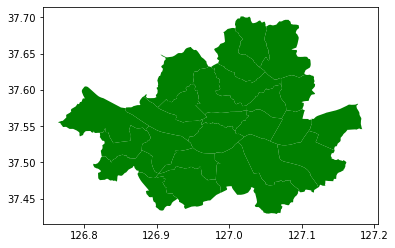

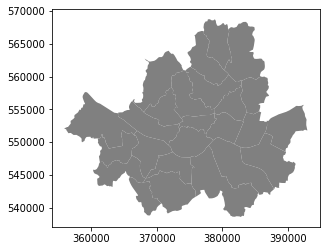

In [8]:
# _07 plot으로 그려보기
print(type(seoul_sgg))
print(seoul_sgg.crs)
seoul_sgg2 = seoul_sgg.to_crs(epsg=5185)
seoul_sgg.plot(color='green')
seoul_sgg2.plot(color='gray')

In [9]:
# _08 시군구 geojson 생성하기
seoul_sgg.to_file('./maps/output/seoul_sgg.geojson' , driver='GeoJSON')

# 서울시 스타벅스 매장 목록
* 서울시 스타벅스 매장 목록 엑셀 파일 불러오기
* 위도, 경도 좌표 정보를 이용해 GeoDataFrame으로 변환하기
* 서울시 스타벅스 매장 목록 데이터를 지도파일로 저장하기

In [10]:
# _10 pandas를 이용해 서울시 스타벅스 목록 데이터(엑셀) 불러오기
import pandas as pd
seoul_starbucks = pd.read_excel('./files/seoul_starbucks.xlsx')
seoul_starbucks.info()
seoul_starbucks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 7 columns):
STORE_NAME    501 non-null object
LAT           501 non-null float64
LONG          501 non-null float64
STORE_TYPE    501 non-null object
ADDRESS       501 non-null object
SIG_KOR_NM    501 non-null object
SIG_CD        501 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 27.5+ KB


,STORE_NAME,LAT,LONG,STORE_TYPE,ADDRESS,SIG_KOR_NM,SIG_CD
0,역삼아레나빌딩,37.501087,127.043069,general,서울특별시 강남구 언주로 425 (역삼동),강남구,11680
1,논현역사거리,37.510178,127.022223,general,서울특별시 강남구 강남대로 538 (논현동),강남구,11680
2,국기원사거리,37.499517,127.031495,general,서울특별시 강남구 테헤란로 125 (역삼동),강남구,11680
3,대치대원빌딩R,37.494668,127.062583,reserve,서울특별시 강남구 남부순환로 2947 (대치동),강남구,11680
4,삼성역섬유센터R,37.507750,127.060651,reserve,서울특별시 강남구 테헤란로 518 (대치동),강남구,11680


In [11]:
# _11 시군구 코드를 문자타입으로 변경하기
seoul_starbucks = seoul_starbucks.astype({'SIG_CD':'str'})
seoul_starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 7 columns):
STORE_NAME    501 non-null object
LAT           501 non-null float64
LONG          501 non-null float64
STORE_TYPE    501 non-null object
ADDRESS       501 non-null object
SIG_KOR_NM    501 non-null object
SIG_CD        501 non-null object
dtypes: float64(2), object(5)
memory usage: 27.5+ KB


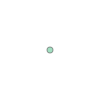

In [12]:
# _12 엑셀 파일의 위도 경도 데이터를 Point타압의 geometry 데이터로 변환하기
geometry = gpd.points_from_xy(seoul_starbucks.LONG, seoul_starbucks.LAT)
geometry[0]

In [13]:
# _13 GeoDataFrame 생성하기
coulumns = ['STORE_NAME', 'STORE_TYPE', 'ADDRESS', 'SIG_CD', 'SIG_KOR_NM']
seoul_sb_gdf = gpd.GeoDataFrame(seoul_starbucks[coulumns], geometry=geometry, crs=from_epsg(4326))
seoul_sb_gdf.info()
seoul_sb_gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 6 columns):
STORE_NAME    501 non-null object
STORE_TYPE    501 non-null object
ADDRESS       501 non-null object
SIG_CD        501 non-null object
SIG_KOR_NM    501 non-null object
geometry      501 non-null object
dtypes: object(6)
memory usage: 23.6+ KB


,STORE_NAME,STORE_TYPE,ADDRESS,SIG_CD,SIG_KOR_NM,geometry
0,역삼아레나빌딩,general,서울특별시 강남구 언주로 425 (역삼동),11680,강남구,POINT (127.043069 37.501087)
1,논현역사거리,general,서울특별시 강남구 강남대로 538 (논현동),11680,강남구,POINT (127.022223 37.510178)
2,국기원사거리,general,서울특별시 강남구 테헤란로 125 (역삼동),11680,강남구,POINT (127.031495 37.499517)
3,대치대원빌딩R,reserve,서울특별시 강남구 남부순환로 2947 (대치동),11680,강남구,POINT (127.062583 37.494668)
4,삼성역섬유센터R,reserve,서울특별시 강남구 테헤란로 518 (대치동),11680,강남구,POINT (127.060651 37.50775)


In [14]:
# _14 타입 확인
print(type(seoul_sb_gdf))
print(seoul_sb_gdf.crs)

<class 'geopandas.geodataframe.GeoDataFrame'>
{'init': 'epsg:4326', 'no_defs': True}


In [15]:
# 폴더생성
!mkdir ./maps/final

mkdir: ./maps/final: File exists


In [16]:
# _15 서울시 스타벅스 매장 지도 파일 생성하기
seoul_sb_gdf.to_file('./maps/final/seoul_starbucks.geojson', driver='GeoJSON')